## 1. Vehicle Routing Problem

In [2]:
import numpy as np
from Numberjack import *
import matplotlib.pyplot as plt
import networkx as ntx


a) rede de estradas <=> grafo orientado

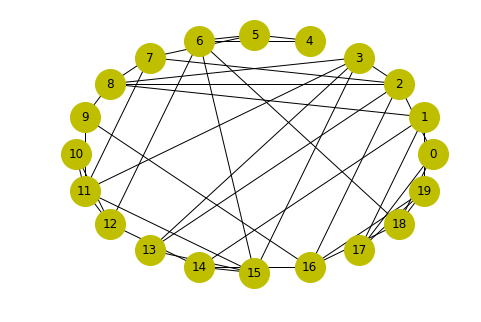

{(2, 16): 8, (17, 19): 2, (6, 18): 9, (10, 11): 9, (12, 14): 7, (3, 13): 2, (5, 6): 3, (2, 8): 7, (13, 15): 9, (0, 18): 1, (10, 12): 9, (1, 17): 8, (3, 11): 8, (18, 19): 3, (9, 16): 7, (1, 19): 6, (2, 3): 8, (7, 11): 6, (6, 12): 2, (16, 19): 1, (11, 12): 6, (7, 8): 7, (14, 16): 1, (2, 7): 7, (0, 17): 8, (4, 6): 3, (6, 15): 1, (5, 7): 3, (1, 14): 8, (1, 8): 8, (16, 18): 6, (3, 8): 3, (4, 5): 9, (2, 13): 5, (9, 11): 5, (14, 15): 7, (11, 15): 6, (8, 9): 8, (3, 15): 3, (0, 2): 5}


In [120]:

Nodes = 20
M = 7
Carros = 3

'''
G = np.random.randint(M,size = (Nodes,Nodes),dtype = np.uint8)

g = ntx.DiGraph()
g.add_nodes_from(range(Nodes))

for i in range(Nodes):
    for j in range(Nodes):
        if(G[i,j]==1 and i!=j):
            g.add_edge(i,j)
            g.add_edge(j,i)
            G[i,j]=G[j,i]=np.random.randint(M+1,20)
        else:
            if(G[i,j]<M+1):
                G[i,j]=0

print (G)
'''

g = ntx.DiGraph()
g = ntx.connected_watts_strogatz_graph(Nodes,5,0.5)

EdgesP = {}
for i, j in g.edges():
    EdgesP[(j,i)] = EdgesP[(i,j)] = np.random.randint(1,10)

ntx.draw_shell(g,arrows=False,node_size=900,node_color='y',with_labels=True)
plt.show()

print(EdgesP)

b)  $C_{i,j}$ e $t_{i,j}$ 

os carros começam no nodo Nodes-1

In [134]:
G = ntx.DiGraph()

G.add_nodes_from(g)
for i, j in g.edges():
    G.add_edge(i, j, weight = EdgesP[(i,j)])
    G.add_edge(j, i, weight = EdgesP[(i,j)])
    
'''
for i in range(Nodes):
    for j in range(i+1,Nodes):
        if((i,j) not in G.edges()):
'''

dic = ntx.shortest_path(G)
print(dic[3][4])

for k1, d in dic.items():
    for k2, l in d.items():
        if((k1,k2) not in G.edges()):
            w = 0
            for i in range(len(l)-1):
                w += EdgesP[(l[i],l[i+1])]
            
            EdgesP[(k1,k2)] = EdgesP[(k2,k1)] = w
            G.add_edge(k1,k2, weight = w)
            G.add_edge(k2,k1, weight = w)
   




Clientes = np.random.randint(0, 2, size = Nodes - 1)
#print(Clientes)

Rotas = [VarArray(Nodes*3,Nodes) for i in range (Carros)]

print(G.edges(data=True))
ntx.draw_shell(G,arrows=False,node_size=900,node_color='y',with_labels=True)
plt.show()

[3, 15, 6, 4]


KeyError: (17, 1)

c) Restrições

In [138]:

model=Model()
for i in Rotas:
    model.add(i[0]==0)
    for j in range(Nodes*3-1):
        if (i[j]!=0 or i[j+1]!=0):
            model.add((i[j],i[j+1])in g.edges())

## 2. Sudoku

In [ ]:
from math import *

N = 3
NS = N*N
Gre = Matrix(NS,NS,1,NS)
model = Model()


## Popular a Grelha de Sudoku





Preencher a Grelha
todos os pequenos quadrados têm diferentes números

$\forall_{i< N²}\forall_{j< N²}\forall_{i<i2\leq N²}
\forall_{j<j2\leq N²}\big(M[i,j] =M[i2,j2] \Rightarrow \big(i/N \neq i2/N\big) \vee \big(j/N \neq j2/N\big)  \big)$
        
todas as linhas têm diferentes números

$\forall_{i\leq N²}\forall_{j< N²}\forall_{j<j2\leq N²}\big(M[i,j] \neq M[i,j2] \big)$

todas as colunas têm diferentes números

$\forall_{i< N²}\forall_{i<i2\leq N²}\forall_{j\leq N²}\big(M[i,j] \neq M[i2,j] \big)$


In [ ]:
for i in range(N):
    for j in range(N):
        model.add(AllDiff(Gre[i*N:(i+1)*N,j*N:(j+1)*N].flat))
        model.add(AllDiff(Gre[i*N+j]))
        model.add(AllDiff(Gre.col[i*N+j]))



Resolver

In [ ]:
model.load('SCIP').solve()

print(Gre)